In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seawater as csr
from matplotlib import cm

In [2]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

### deal with ARGO data

In [3]:
# read multiple files
import os
# path="/localdata/xiaoxiaoyu/aoml3/"
path="/Users/yuxiao/Desktop/aoml3/argo_200704/"
files=os.listdir(path)
files2=files[:]


def hasNumber(inputString):
    return any(char.isdigit() for char in inputString)   # if there is a digit in a string, and, should start with D
for file in files:
    if not hasNumber(file) or not file.startswith('D'):
        files2.remove(file)         # remove all the items has no digit 
files=files2
nfile=len(files)

In [72]:
print(nfile)


22


In [4]:
nc=Dataset(path+files[14])

In [43]:
# nc.set_auto_mask(False)
date0 = datetime.strptime((nc.variables['REFERENCE_DATE_TIME'][:]).tostring().decode('utf-8'),"%Y%m%d%H%M%S")
date=[]
lat=[]
lon=[]
temp=[]
salt=[]
pres=[]
days=[]
for file in files:
    if not os.path.isdir(file):
        f=Dataset(path+file)
        date_f=date0+timedelta(days=f.variables['JULD'][:][0])       #deal with the datetime
        date.append(date_f)
        day_f=date_f.day
        days.append(day_f)
        lat_f=f.variables['LATITUDE'][0]
        lat.append(lat_f)
#         lat.append(lat_f.filled().tolist())
        lon_f=f.variables['LONGITUDE'][0]
        lon.append(lon_f)
#         lon.append(lon_f.filled().tolist())
        temp_f=f.variables['TEMP'][0]
        temp.append(temp_f)
#         temp.append(temp_f.filled().tolist())
        salt_f=f.variables['PSAL'][0]
        salt.append(salt_f)
#         salt.append(salt_f.filled().tolist())
        pres_f=f.variables['PRES'][0]
        pres.append(pres_f)
#         pres.append(pres_f.filled().tolist())

date

[datetime.datetime(2007, 8, 20, 13, 25, 22, 1266),
 datetime.datetime(2007, 8, 24, 13, 36, 14, 2075),
 datetime.datetime(2007, 8, 18, 12, 36, 5, 997505),
 datetime.datetime(2007, 8, 14, 13, 51, 27, 1991),
 datetime.datetime(2007, 8, 14, 12, 11, 59, 244),
 datetime.datetime(2007, 8, 14, 12, 13, 29, 997940),
 datetime.datetime(2007, 8, 14, 13, 52, 41, 61),
 datetime.datetime(2007, 8, 24, 13, 35, 36, 6546),
 datetime.datetime(2007, 8, 24, 12, 0, 9, 1923),
 datetime.datetime(2007, 8, 21, 13, 6, 4, 2800),
 datetime.datetime(2007, 8, 10, 11, 57, 11, 999302),
 datetime.datetime(2007, 8, 10, 13, 33, 30, 229),
 datetime.datetime(2007, 8, 20, 11, 51, 46, 1472),
 datetime.datetime(2007, 8, 16, 21, 32, 38, 565),
 datetime.datetime(2007, 8, 20, 16, 53, 50, 2785),
 datetime.datetime(2007, 8, 22, 12, 47, 45, 999985),
 datetime.datetime(2007, 8, 14, 12, 11, 37, 122),
 datetime.datetime(2007, 8, 11, 11, 38, 39, 999218),
 datetime.datetime(2007, 8, 16, 6, 39, 49, 1083),
 datetime.datetime(2007, 8, 12, 1

In [37]:
lon_1=[round(x,1) for x in lon]
len(lon_1)

22

In [38]:
ind1=lon_1.index(-54.700000000000003)
print(ind1)
print(files[ind1])
print(date[ind1])
print(temp[ind1][0:30])
pres[ind1][0:30]

20
D4900756_045.nc
2007-08-24 13:36:29.997482
[ 22.96899986  23.27599907  24.8560009   24.95199966  24.96800041
  25.03000069  25.00499916  24.95100021  24.89500046  24.83300018
  24.78800011  24.7159996   24.71100044  24.63299942  24.39299965
  24.20800018  23.96699905  23.83200073  23.67900085  23.46100044
  23.38400078  23.08600044  23.03899956  22.98800087  22.77899933
  22.50900078  22.40600014  22.04599953  21.86700058  21.3409996 ]


array([   5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,   45.,
         50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,   90.,
         95.,  100.,  105.,  110.,  115.,  120.,  125.,  130.,  135.,
        140.,  145.,  150.], dtype=float32)

#### 对一系列list (tuples)，根据其中一个list来 排序

In [47]:
numbers=list(range(nfile))
argo_1=[numbers,days,lat,lon,temp,salt,pres]
# argo_1=list(zip(numbers,days,lat,lon,temp,salt,pres))
# import operator
# argo_2=sorted(argo_1, key = itemgetter(3))   #按照lat来排序
# argo_3=list(zip(*argo_2))

In [49]:
argo_1={"number" : list(numbers), 
 "day" : list(days), 
 "lat" : [round(x,1) for x in list(argo_1[2])], 
 "lon" : [round(x,1) for x in list(argo_1[3])],     # another way to do it: np.around(list(argo_3[3]),decimals=1)
 "temp": list(argo_1[4]), 
 "salt": list(argo_1[5]),  
 "pres": list(argo_1[6])}


#### 查找满足条件的argo profile

In [56]:
argo_4=argo_1
ind1=argo_4['lon'].index(-64.799999999999997)
print(ind1)
ind2=argo_4['number'][ind1]
print(files[ind2])
argo_4['lon'][ind1],argo_4['lat'][ind1],argo_4['day'][ind1]

15
D4900754_045.nc


(-64.799999999999997, 16.300000000000001, 22)

In [55]:
ind1=argo_4['lon'].index(-64.599999999999994)
print(ind1)
ind2=argo_4['number'][ind1]
print(files[ind2])
argo_4['lon'][ind1],argo_4['lat'][ind1],argo_4['day'][ind1]

19
D4900754_044.nc


(-64.599999999999994, 16.699999999999999, 12)

### put the argo locations with the hurricane track 

In [197]:
# read in cresm input data

# nc1=Dataset(path1+"/dataset-global-reanalysis-phy-001-025-ran-fr-glorys2v4-daily_1549497434456.nc")

nc1=Dataset(path1+"/dataset-global-reanalysis-phy-001-025-ran-fr-glorys2v4-daily_1549498296910.nc")

# nc1.set_auto_mask(False)  # x.mask = ma.nomask
lon_curv2=nc1.variables['longitude'][:]
lat_curv2=nc1.variables['latitude'][:]
temp_nc2=nc1.variables['temperature'][0,0,:,:]  #only use the first date
print(lon_curv2)

ind1=np.where(lon_curv2==-140.5)[0][0]
ind2=np.where(lon_curv2==-15.5)[0][0]
ind3=np.where(lat_curv2==-5.5)[0][0]
ind4=np.where(lat_curv2==40.5)[0][0]
lon_curv3=lon_curv2[ind1:ind2]
lat_curv3=lat_curv2[ind3:ind4]
temp_nc3=temp_nc2[ind3:ind4,ind1:ind2]-273.15
np.shape(temp_nc3)
lat_curv3[-1]

[-180.   -179.75 -179.5  ...,  179.25  179.5   179.75]


40.25

Text(0.5,1,'Argo floats locations with Copernicus on Aug 14th, 2007')

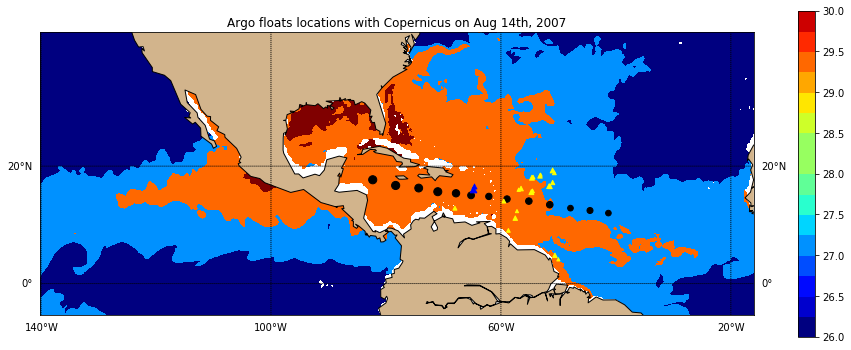

In [200]:
fig = plt.figure(num=None, figsize=(16, 6) )
m = Basemap(projection='merc',llcrnrlat=lat_curv3[0],urcrnrlat=lat_curv3[-2],llcrnrlon=lon_curv3[1],urcrnrlon=lon_curv3[-2],resolution='c')
m.drawcoastlines()
m.fillcontinents(color='tan')
# draw parallels and meridians.
m.drawparallels(np.arange(-20.,40.,20.),labels=[True,True,False,False],dashes=[1,1])
m.drawmeridians(np.arange(-140.,20.,40.),labels=[False,False,False,True],dashes=[1,1])

ny = temp_nc3.shape[0]
nx = temp_nc3.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
p = m.contourf(x, y, temp_nc3, 10, vmin=26, vmax=30, cmap=plt.cm.get_cmap('jet', 16))  #cm.nipy_spectral,bwr, RdBu_r , vmin=-2, vmax=2

cbar = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('jet', 16))
cbar.set_array(temp_nc2)
cbar.set_clim(26,30.25)
plt.colorbar(cbar, boundaries=np.arange(26,30.25,0.25))  

# hurricane tracks
# start with 08-15 00:00, every 12 hours
xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05]
s = vmax*5
x,y=m(xh,yh)
plt.scatter(x, y, s, c="black", marker='o',label="Dean track")

# put argo locations on it
# the chosen one is blue color

xh4=argo_4['lon']
yh4=argo_4['lat']
days4=argo_4['day']
s4 = days4*2
x4,y4=m(xh4,yh4)
plt.scatter(x4, y4, s4, c="yellow", marker='^',label="Argo")


xh2=argo_4['lon'][19]
yh2=argo_4['lat'][19]
days2=argo_4['day'][19]
s2 = days2*2
x2,y2=m(xh2,yh2)
plt.scatter(x2, y2, s2, c="blue", marker='^',label="Argo")
# plt.scatter(x2, y2, s2, c="yellow", marker='^',label="Argo")

xh3=argo_4['lon'][15]
yh3=argo_4['lat'][15]
days3=argo_4['day'][15]
s3 = days3*2
x3,y3=m(xh3,yh3)
# plt.scatter(x3, y3, s3, c="yellow", marker='^',label="Argo")
plt.scatter(x3, y3, s3, c="blue", marker='^',label="Argo")

plt.title('Argo floats locations with Copernicus on Aug 14th, 2007')

In [187]:
path1="/Users/yuxiao/Desktop/aoml3"
nc2=Dataset(path1+"/20070814120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc")
lon_curv2=nc2.variables['lon'][:]
lat_curv2=nc2.variables['lat'][:]
ind1=np.where(lon_curv2==-170.125)[0][0]
ind2=np.where(lon_curv2==170.125)[0][0]
ind3=np.where(lat_curv2==-25.125)[0][0]
ind4=np.where(lat_curv2==40.625)[0][0]
lon_curv3=lon_curv2[ind1:ind2]
lat_curv3=lat_curv2[ind3:ind4]
temp_nc2=nc2.variables['analysed_sst']  #only use the first date
temp_nc3=temp_nc2[0,ind3:ind4,ind1:ind2]-273.15
np.shape(temp_nc3)

(263, 1361)

Text(0.5,1,'Argo floats locations')

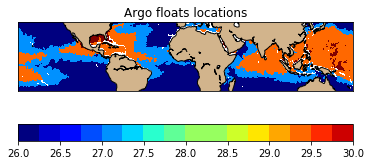

In [188]:
# fig = plt.figure(num=None, figsize=(16, 6) )
m = Basemap(projection='merc',llcrnrlat=lat_curv3[0],urcrnrlat=lat_curv3[-1],llcrnrlon=lon_curv3[0],urcrnrlon=lon_curv3[-1],resolution='c')
# m = Basemap(projection='merc')
m.drawcoastlines()
m.fillcontinents(color='tan')
# draw parallels and meridians.
# m.drawparallels(np.arange(-20.,40.,20.),labels=[True,True,False,False],dashes=[1,1])
# m.drawmeridians(np.arange(-140.,20.,40.),labels=[False,False,False,True],dashes=[1,1])

ny = temp_nc3.shape[0]
nx = temp_nc3.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
p = m.contourf(x, y, temp_nc3, 10, vmin=26, vmax=30, cmap=plt.cm.get_cmap('jet', 16))  #cm.nipy_spectral,bwr, RdBu_r , vmin=-2, vmax=2

cbar = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('jet', 16))
cbar.set_array(temp_nc2)
cbar.set_clim(26,30.25)
plt.colorbar(cbar, boundaries=np.arange(26,30.25,0.25), orientation='horizontal')  

# plt.scatter(x3, y3, s3, c="blue", marker='^',label="Argo")

plt.title('Argo floats locations')

Text(0.5,1,'Argo floats locations with OISST on Aug 14th, 2007')

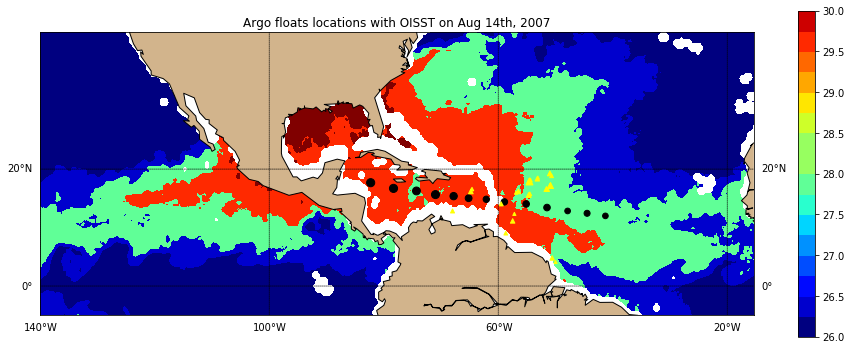

In [193]:
path1="/Users/yuxiao/Desktop/aoml3"
nc2=Dataset(path1+"/20070814120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc")
lon_curv2=nc2.variables['lon'][:]
lat_curv2=nc2.variables['lat'][:]
ind1=np.where(lon_curv2==-140.125)[0][0]
ind2=np.where(lon_curv2==-15.125)[0][0]  # actually didn't include this, only include -15.375
ind3=np.where(lat_curv2==-5.125)[0][0]
ind4=np.where(lat_curv2==40.625)[0][0]
lon_curv3=lon_curv2[ind1:ind2]

lat_curv3=lat_curv2[ind3:ind4]
temp_nc2=nc2.variables['analysed_sst']  #only use the first date
temp_nc3=temp_nc2[0,ind3:ind4,ind1:ind2]-273.15
np.shape(temp_nc3)

fig = plt.figure(num=None, figsize=(16, 6) )
m = Basemap(projection='merc',llcrnrlat=-5.125,urcrnrlat=40.5,llcrnrlon=-140.125,urcrnrlon=-15.375,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='tan')
# draw parallels and meridians.
m.drawparallels(np.arange(-20.,40.,20.),labels=[True,True,False,False],dashes=[1,1])
m.drawmeridians(np.arange(-140.,20.,40.),labels=[False,False,False,True],dashes=[1,1])

ny = temp_nc3.shape[0]
nx = temp_nc3.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
p = m.contourf(x, y, temp_nc3, 10, vmin=26, vmax=30, cmap=plt.cm.get_cmap('jet', 16))  #cm.nipy_spectral,bwr, RdBu_r , vmin=-2, vmax=2

cbar = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('jet', 16))
cbar.set_array(temp_nc2)
cbar.set_clim(26,30.25)
plt.colorbar(cbar, boundaries=np.arange(26,30.25,0.25))  

# hurricane tracks
# start with 08-15 00:00, every 12 hours
xh=[-41.3,-44.5,-47.9,-51.5,-55.14,-58.94,-62.1,-65.19,-67.81,-70.98,-74.3,-78.31,-82.30]
yh=[12.16,12.6,13.0,13.58,14.19,14.54,14.98,15.160,15.509,15.77,16.38,16.81,17.76]
vmax=[31.64,36.24,32.28,43.36,42.87,41.48,40.31,46.14,54.13,64.34,61.70,66.18,66.05]
s = vmax*5
x,y=m(xh,yh)
plt.scatter(x, y, s, c="black", marker='o',label="Dean track")

# put argo locations on it
# the chosen one is blue color

xh4=argo_4['lon']
yh4=argo_4['lat']
days4=argo_4['day']
s4 = days4*2
x4,y4=m(xh4,yh4)
plt.scatter(x4, y4, s4, c="yellow", marker='^',label="Argo")

xh2=argo_4['lon'][1]
yh2=argo_4['lat'][1]
days2=argo_4['day'][1]
s2 = days2*2
x2,y2=m(xh2,yh2)
# plt.scatter(x2, y2, s2, c="blue", marker='^',label="Argo")
plt.scatter(x2, y2, s2, c="yellow", marker='^',label="Argo")

xh3=argo_4['lon'][2]
yh3=argo_4['lat'][2]
days3=argo_4['day'][2]
s3 = days3*2
x3,y3=m(xh3,yh3)
plt.scatter(x3, y3, s3, c="yellow", marker='^',label="Argo")
# plt.scatter(x3, y3, s3, c="blue", marker='^',label="Argo")

plt.title('Argo floats locations with OISST on Aug 14th, 2007')

In [291]:
f3=Dataset(path+"D4900754_044.nc")
# nc.set_auto_mask(False)
date0 = datetime.strptime((f3.variables['REFERENCE_DATE_TIME'][:]).tostring().decode('utf-8'),"%Y%m%d%H%M%S")
date_f3 = date0+timedelta(days=f3.variables['JULD'][:][0])
lat_f3=f3.variables['LATITUDE'][0].filled().tolist()
lon_f3=f3.variables['LONGITUDE'][0].filled().tolist()
temp_f3=f3.variables['TEMP'][0].filled().tolist()
salt_f3=f3.variables['PSAL'][0].filled().tolist()
pres_f3=f3.variables['PRES'][0].filled().tolist()

f4=Dataset(path+"D4900754_045.nc")
# nc.set_auto_mask(False)
date_f4 = date0+timedelta(days=f4.variables['JULD'][:][0])
lat_f4=f4.variables['LATITUDE'][0].filled().tolist()
lon_f4=f4.variables['LONGITUDE'][0].filled().tolist()
temp_f4=f4.variables['TEMP'][0].filled().tolist()
salt_f4=f4.variables['PSAL'][0].filled().tolist()
pres_f4=f4.variables['PRES'][0].filled().tolist()
print(lat_f3,lon_f3,date_f3)
print(lat_f4,lon_f4,date_f4)


16.67099952697754 -64.6449966430664 2007-08-12 12:53:48.002930
16.343000411987305 -64.83899688720703 2007-08-22 12:47:45.999985


[ 28.89500046  28.8939991   28.8939991   28.8939991   28.89599991
  28.89299965  28.75499916  28.50399971  28.13899994  28.07600021
  28.03899956  28.06599998  28.          27.8010006   27.71699905]
[ 28.54599953  28.54000092  28.54299927  28.54400063  28.54500008
  28.5739994   28.62000084  28.61300087  28.56800079  28.48999977
  28.43799973  28.37299919  28.30500031  27.52700043  27.46999931]


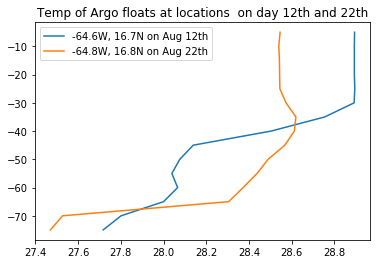

In [215]:
# draw the profile of two temps
t=argo_4['pres'][19][0:15]
t3=argo_4['pres'][19][0:15]
t2=[t1*-1 for t1 in t]
t4=[t1*-1 for t1 in t3]
data1=argo_4['temp'][19][0:15]
data2=argo_4['temp'][15][0:15]
plt.plot(data1, t2,linestyle='solid',label='-64.6W, 16.7N on Aug 12th')
plt.title('Temp of Argo floats at locations  on day 12th and 22th')
plt.plot(data2, t4,linestyle='solid',label='-64.8W, 16.8N on Aug 22th')
plt.legend()
print(data1)
print(data2)

In [211]:
print(argo_4['temp'][15][0:15])
t=argo_4['pres'][15][0:15]
t2=[t1*-1 for t1 in t]
t2

[ 28.54599953  28.54000092  28.54299927  28.54400063  28.54500008
  28.5739994   28.62000084  28.61300087  28.56800079  28.48999977
  28.43799973  28.37299919  28.30500031  27.52700043  27.46999931]


[-5.0,
 -10.0,
 -15.0,
 -20.0,
 -25.0,
 -30.0,
 -35.0,
 -40.0,
 -45.0,
 -50.0,
 -55.0,
 -60.0,
 -65.0,
 -70.0,
 -75.0]

[ 35.06200027  35.06399918  35.06200027  35.06299973  35.06499863
  35.09799957  35.20600128  35.33800125  35.46900177  35.5019989
  35.53099823  35.56100082  35.57699966  35.97200012  36.01699829]


TypeError: only integer scalar arrays can be converted to a scalar index

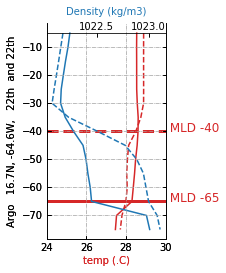

In [218]:
point_str="Argo   "+str(argo_4['lat'][19])+"N, "+str(argo_4['lon'][19])+"W,   "+str(argo_4['day'][15])+"th  "+"and "+str(argo_4['day'][15])+"th"
t=argo_4['pres'][15][0:15]
t2=[t1*-1 for t1 in t]
# t2=t
temp_p1=argo_4['temp'][15][0:15]
temp_p2=argo_4['temp'][19][0:15]
salt_p1=argo_4['salt'][15][0:15]
salt_p2=argo_4['salt'][19][0:15]
print(salt_p1)
dens1 = csr.dens(salt_p1, temp_p1, t2)

plot_profile_blt_twolines(temp_p1,salt_p1,temp_p2,salt_p2,t2,point_str)

In [217]:


def plot_profile_blt_twolines(temp1,salt1,temp2,salt2,depth,point_str):
    # use temp and salt to calulate density, then use depth to calculate BLT, ILD, MLD
    #  plot two files with the ILD, MLD lines
    #  point_str,date are string
    #  plot four lines together (before hurricane and after hurricane)  
    from mpl_toolkits.axes_grid1 import host_subplot
    import mpl_toolkits.axisartist as AA
    
    t=depth
    dens1 = csr.dens(salt1, temp1, t)   # use this function to calulate density
    dens2 = csr.dens(salt2, temp2, t)     

#     fig, ax1 = plt.subplots()
    fig = plt.figure(1, (6, 8))
    plt.subplots_adjust(top=0.5,right=0.4)
    ax1 = host_subplot(111, axes_class=AA.Axes)
    
    # print('depth of point ',point_str)
    color = 'tab:red'
    ax1.set_xlabel('temp (.C)', color=color)
    ax1.set_ylabel(point_str, color='black')
    ax1.plot(temp1, t, color=color,label="Temp before Hurricane")
    ax1.plot(temp2, t, color=color, linestyle='dashed',label="Temp after Hurricane")       
    ax1.tick_params(axis='x', labelcolor=color)
    ax1.grid(True, linestyle='-.',lw=0.6)
    
    ild1=int(mld_temp(temp1, t))
    ild2=int(mld_temp(temp2, t))
    tempmin=24
    tempmax=30 
    ax1.set_xlim(tempmin, tempmax)
    ax1.plot([tempmin, tempmax], [ild1, ild1], linestyle ='-',lw=3, color=color)
    ax1.plot([tempmin, tempmax], [ild2, ild2], linestyle ='--',lw=3, color=color)
    ax1.text(tempmax, ild1, ' MLD '+str(ild1), fontsize=12, color=color)
    ax1.text(tempmax, ild2, ' MLD '+str(ild2), fontsize=12, color=color)
#     ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.4))
    
    
    ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
     
    ax2.plot(dens1,t, color=color,label="Density before Hurricane")
    ax2.plot(dens2,t, color=color, linestyle='dashed',label="Density after Hurricane")
    
    
          #设置坐标轴摆放位置和距离
    offset = -10
    new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
    ax2.axis["top"] = new_fixed_axis(loc="top",axes=ax2,offset=( 0,offset))
    ax2.axis["top"].toggle(all=True)
    ax2.set_xlabel('Density (kg/m3)', color=color)  # we already handled the x-label with ax1
    ax2.tick_params(axis='top', labelcolor=color)
    print(mld_density(temp1,salt1,t))
    mld1=int(mld_density(temp1,salt1,t))
    mld2=int(mld_density(temp2,salt2,t))
    densmin=1021
    densmax=1026
    ax2.set_xlim(densmin, densmax)
    ax2.plot([densmin, densmax], [mld1, mld1], linestyle ='-',lw=3, color=color)
    ax2.plot([densmin, densmax], [mld2, mld2], linestyle ='--',lw=3, color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax2.text(densmax, mld1, ' ILD '+str(mld1), fontsize=12, color=color)
    ax2.text(densmax, mld2, ' ILD '+str(mld2), fontsize=12, color=color)
    
    
    
    ax3 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'orange'
    ax3.plot(salt1,t, color=color,label="Salinity before Hurricane")
    
    saltmin= 34.8
    saltmax= 37
    ax3.set_xlim(saltmin, saltmax)
    
    #设置坐标轴摆放位置和距离
    offset = 40
    new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
    ax3.axis["top"] = new_fixed_axis(loc="bottom",axes=ax3,offset=( 0,offset))
    ax3.axis["top"].toggle(all=True)
    ax3.set_xlabel('Salinity (psu)', color=color)
    ax3.tick_params(axis='top', labelcolor=color)
    
    plt.legend(loc='lower left', bbox_to_anchor=(0.05, 0.1))
    return plt.show()


### Then we seperate ARGO into before hurricane and after hurricane

In [29]:
# read multiple files before hurrican came
import os
path1="/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/argo_200704/before/"
files_1=os.listdir(path1)
files2=files_1[:]


def hasNumber(inputString):
    return any(char.isdigit() for char in inputString)   # if there is a digit in a string, and, should start with D
for file in files_1:
    if not hasNumber(file) or not file.startswith('D'):
        files2.remove(file)         # remove all the items has no digit 
files_1=files2
print(len(files_1))
nc1=Dataset(path1+files_1[1])
nc1.set_auto_mask(False)
date0 = datetime.strptime((nc1.variables['REFERENCE_DATE_TIME'][:]).tostring().decode('utf-8'),"%Y%m%d%H%M%S")

date_1=[]
lat_1=[]
lon_1=[]
temp_1=[]
salt_1=[]
press_1=[]
file_name_1=[]
for file in files_1:
    if not os.path.isdir(file):
        f=Dataset(path1+"/"+file)
        f.set_auto_mask(False)
        pres_f=f.variables['PRES'][0][1]
        if round(pres_f)==10.0:
#             print(file)
            file_name_1.append(file)
            press_1.append(pres_f)
            date_f=date0+timedelta(days=f.variables['JULD'][:][0])       #deal with the datetime
            date_1.append(date_f)
            lat_f=f.variables['LATITUDE'][:]
            lat_1.append(lat_f[0])
            lon_f=f.variables['LONGITUDE'][:]
            lon_1.append(lon_f[0])
            temp_f=f.variables['TEMP'][:]
            temp_1.append(temp_f[0])
            salt_f=f.variables['PSAL'][:]
            salt_1.append(salt_f[0])
            t_1=-f.variables['PRES'][:][0]

days_1=[date_f.day for date_f in date_1] 
lon_1=[int(round(lonr)) for lonr in lon_1]
lat_1=[int(round(latr)) for latr in lat_1]
a_1=len(lon_1)
b_1=len(temp_1[0][:])

t_1[0:14]


44


array([ -5., -10., -15., -20., -25., -30., -35., -40., -45., -50., -55.,
       -60., -65., -70.], dtype=float32)

In [37]:
# 查找 
for ind, lon in enumerate (lon_1):
    if -53>lon>-57 and 15>lat_1[ind]>10:
        print(str(ind)+" "+str(lon)+" "+str(lat[ind])+" "+str(days_1[ind]))

### after hurricane

In [45]:
path2="/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/argo_200704/after/"
files2=os.listdir(path2)
files22=files2[:]
print(len(files22))

def hasNumber(inputString):
    return any(char.isdigit() for char in inputString)   # if there is a digit in a string, and, should start with D
for file in files2:
    if not hasNumber(file) or not file.startswith('D'):
        files22.remove(file)         # remove all the items has no digit 
files_2=files22
len(files_2)

nc2=Dataset(path2+files_2[1])
nc2.set_auto_mask(False)
date0 = datetime.strptime((nc2.variables['REFERENCE_DATE_TIME'][:]).tostring().decode('utf-8'),"%Y%m%d%H%M%S")
date_2=[]
lat_2=[]
lon_2=[]
temp_2=[]
salt_2=[]
press_2=[]
file_name_2=[]
for file in files_2:
    
    if not os.path.isdir(file):
        f=Dataset(path2+"/"+file)
        f.set_auto_mask(False)
        pres_f=f.variables['PRES'][0][1]
        if round(pres_f)==10.0:
#             print(file)
            file_name_2.append(file)
            press_2.append(pres_f)
            date_f=date0+timedelta(days=f.variables['JULD'][:][0])       #deal with the datetime
            date_2.append(date_f)
            lat_f=f.variables['LATITUDE'][:]
            lat_2.append(lat_f[0])
            lon_f=f.variables['LONGITUDE'][:]
            lon_2.append(lon_f[0])
            temp_f=f.variables['TEMP'][:]
            temp_2.append(temp_f[0])
            salt_f=f.variables['PSAL'][:]
            salt_2.append(salt_f[0])
            t_2=-f.variables['PRES'][:][0]

days_2=[date_f.day for date_f in date_2] 
lon_2=[int(round(lonr)) for lonr in lon_2]
lat_2=[int(round(latr)) for latr in lat_2]
a_2=len(lon_2)
b_2=len(temp_2[0][:])


87


In [47]:
for ind, lon in enumerate (lon_2):
    if -53>lon>-57 and 15>lat_2[ind]>5:
        print(str(ind)+" "+str(lon)+" "+str(lat_2[ind])+" "+str(days_2[ind])+" "+str(file_name_2[ind]))

### 画不同位置的argo profiles

In [63]:
# plot another point in the non plume area 
path_21="/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/argo_200704/before/"
filename_21='D4900823_010.nc'
nc_21=Dataset(path_21+filename_21)
nc_21.set_auto_mask(False)

temp1_21=np.squeeze(nc_21.variables['TEMP'][:])
salt1_21=np.squeeze(nc_21.variables['PSAL'][:])

temp_21=temp1_21[0:20]
salt_21=salt1_21[0:20]

date0 = datetime.strptime((nc_21.variables['REFERENCE_DATE_TIME'][:]).tostring().decode('utf-8'),"%Y%m%d%H%M%S")
date_f=date0+timedelta(days=nc_21.variables['JULD'][:][0])
day_21=date_f.day

path_22="/Network/Servers/csrp.tamu.edu/Volumes/csrp1/Users/xiaoxiaoyu/Desktop/aoml3/argo_200704/after/"
filename_22='D4900823_011.nc'
nc_22=Dataset(path_22+filename_22)
nc_22.set_auto_mask(False)

temp1_22=np.squeeze(nc_22.variables['TEMP'][:])
salt1_22=np.squeeze(nc_22.variables['PSAL'][:])
temp_22=temp1_22[0:20]
salt_22=salt1_22[0:20]
date_f=date0+timedelta(days=nc_22.variables['JULD'][:][0])
day_22=date_f.day

pres=nc_22.variables['PRES']
depth_22=-pres[:][0][0:20]
lat_21=nc_21.variables['LATITUDE'][:]
lon_21=nc_21.variables['LONGITUDE'][:]

D4900823_010.nc
D4900823_011.nc
27.289
27.388


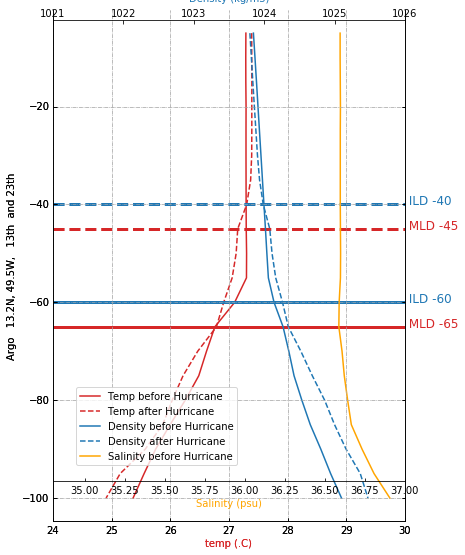

In [113]:
print(filename_21)
print(filename_22)
print(temp_21[0])
print(temp_22[0])
point_str="Argo   "+str(round(lat_21[0],1))+"N, "+str(round(-lon_21[0],1))+"W,   "+str(day_21)+"th  "+"and "+str(day_22)+"th"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

D4900750_056.nc
D4900750_057.nc
28.581
29.311


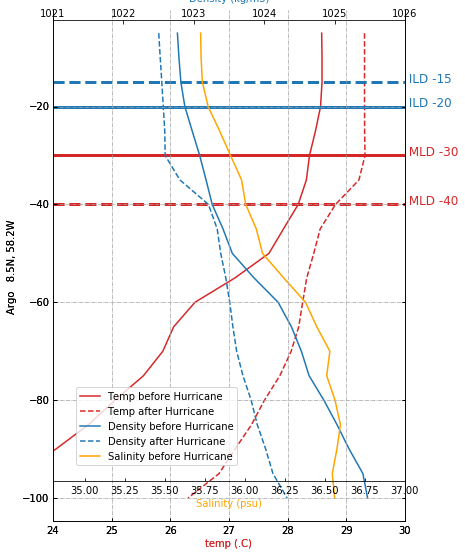

In [25]:
print(filename_21)
print(filename_22)
print(temp_21[0])
print(temp_22[0])
point_str="Argo   "+str(round(lat_21[0],1))+"N, "+str(round(-lon_21[0],1))+"W"
plot_profile_blt_twolines(temp_21,salt_21,temp_22,salt_22,depth_22,point_str)

### 把所有的argo files 画在一起

84


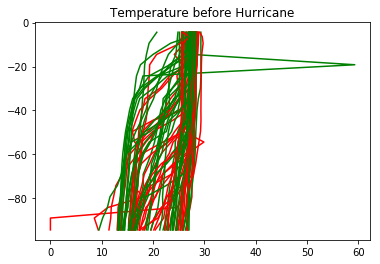

In [126]:
# draw the profile of two temps
temp=temp_2
salt=salt_2
length=a_2
lon=lon_2
lat=lat_2
t=t_2[0:20]

data1=np.empty([length,20])
data_noplume=[]
data_plume=[]
numb=0
for i in range(length):
    if len(temp[i])>20:
        numb=numb+1
        data1[i][0:20]=temp[i][0:20]
        if (salt[i][0]>35.4):
            data_noplume.append(data1[i])
            plt.plot(data1[i], t,linestyle='-',color='green',label=str(lon[i])+'W '+str(lat[i])+'N ')
        else:
            data_plume.append(data1[i])
            plt.plot(data1[i], t,linestyle='-',color='red',label=str(lon[i])+'W '+str(lat[i])+'N ')
# plt.xlim(12, 30)
# plt.xlim(33, 40)
plt.title('Temperature before Hurricane')
# plt.title('Temperature After Hurricane')
# plt.title('Salinity After Hurricane')
# plt.title('Salinity Before Hurricane')
# temp_noplume_mean_before=sum(data_noplume)/len(data_noplume)
# temp_plume_mean_before=sum(data_plume)/len(data_plume)
# temp_noplume_mean_after=sum(data_noplume)/len(data_noplume)
# temp_plume_mean_after=sum(data_plume)/len(data_plume)

# salt_noplume_mean_before=sum(data_noplume)/len(data_noplume)
# salt_plume_mean_before=sum(data_plume)/len(data_plume)
salt_noplume_mean_after=sum(data_noplume)/len(data_noplume)
salt_plume_mean_after=sum(data_plume)/len(data_plume)

print(numb)

Text(0.5,1,'Salinity Beforeand After Hurricane')

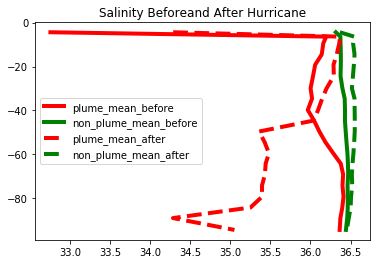

In [111]:
data_plume_mean
plt.plot(salt_plume_mean_before, t,linestyle='-',lw=4,color='red',label='plume_mean_before')
plt.plot(salt_noplume_mean_before, t,linestyle='-',lw=4,color='green',label='non_plume_mean_before')

plt.plot(salt_plume_mean_after, t,linestyle='--',lw=4,color='red',label='plume_mean_after')
plt.plot(salt_noplume_mean_after, t,linestyle='--',lw=4,color='green',label='non_plume_mean_after')

plt.legend()
# plt.xlim(20, 28)
# plt.xlim(33, 40)
# plt.title('Temperature before Hurricane')
# plt.title('Temperature After Hurricane')

plt.title('Salinity Beforeand After Hurricane')
# plt.title('Salinity Hurricane')

Text(0.5,1,'Temperature Beforeand After Hurricane')

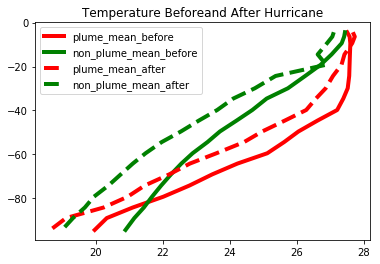

In [112]:
data_plume_mean
plt.plot(temp_plume_mean_before, t,linestyle='-',lw=4,color='red',label='plume_mean_before')
plt.plot(temp_noplume_mean_before, t,linestyle='-',lw=4,color='green',label='non_plume_mean_before')

plt.plot(temp_plume_mean_after, t,linestyle='--',lw=4,color='red',label='plume_mean_after')
plt.plot(temp_noplume_mean_after, t,linestyle='--',lw=4,color='green',label='non_plume_mean_after')

plt.legend()
# plt.xlim(20, 28)
# plt.xlim(33, 40)
# plt.title('Temperature before Hurricane')
# plt.title('Temperature After Hurricane')

plt.title('Temperature Beforeand After Hurricane')
# plt.title('Salinity Hurricane')

Text(0.5,1,'Salinity Before Hurricane')

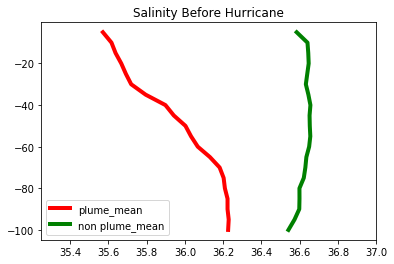

In [79]:

plt.plot(salt_plume_mean, t,linestyle='-',lw=4,color='red',label='plume_mean')
plt.plot(salt_noplume_mean, t,linestyle='-',lw=4,color='green',label='non plume_mean')
plt.legend()
# plt.xlim(20, 28)
plt.xlim(35.25, 37)

# plt.title('Salinity After Hurricane')
plt.title('Salinity Before Hurricane')

### CRESM

In [116]:
# analysis the CRESM results
path1="/localdata/xiaoxiaoyu/CRESM/"
nc2=Dataset(path1+'TXGLO.ocn.hi.2007-08-14_21:00:00.nc')
nc3=Dataset(path1+'TXGLO.ocn.hi.2007-08-20_21:00:00.nc')
nc2.set_auto_mask(False)
nc3.set_auto_mask(False)
temp3=nc3.variables["temp"][0,::-1,:,:]
temp2=nc2.variables["temp"][0,::-1,:,:]
salt3=nc3.variables["salt"][0,::-1,:,:]
salt2=nc2.variables["salt"][0,::-1,:,:]

temp3=np.squeeze(temp3)  #删除没有必要的维度
temp2=np.squeeze(temp2)
salt3=np.squeeze(salt3)
salt2=np.squeeze(salt2)


In [121]:
h,zeta,theta_s,theta_b,hc, N,TYPE,vtran,vstre=get_const(nc2)
z=roms_zlevel(h,zeta,theta_s,theta_b,hc,N,TYPE,vtran=vtran,vstre=vstre)

In [122]:
# 处理单点数据，画剖面图
lon0=402   #218
lat0=268   #314
lat_point0=nc2.variables['lat_rho'][lat0,lon0]
lon_point0=nc2.variables['lon_rho'][lat0,lon0]
print(lon_point0)
z[::-1,0,lat0,lon0][0:14]

-49.5


array([  -3.66689003,  -11.08433238,  -18.54049129,  -26.03841268,
        -33.58281726,  -41.18028949,  -48.83954105,  -56.57175926,
        -64.39105421,  -72.31502238,  -80.36544872,  -88.56917486,
        -96.9591673 , -105.57582688])

In [123]:
cresm_temp_1=temp2[0:14,lat0,lon0]
cresm_salt_1=salt2[0:14,lat0,lon0]
cresm_depth=z[::-1,0,lat0,lon0][0:14]

cresm_temp_2=temp3[0:14,lat0,lon0]
cresm_salt_2=salt3[0:14,lat0,lon0]

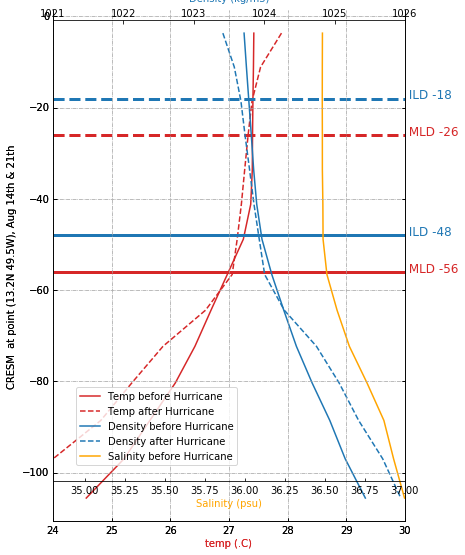

In [125]:
# ax1.set_title('Temperature (°C) at ('+str(round(lon_point0,1))+'°W, '+str(round(lat_point0,1))+'°N)')
point_str="CRESM  at point (13.2N 49.5W), Aug 14th & 21th"
plot_profile_blt_twolines(cresm_temp_1,cresm_salt_1,cresm_temp_2,cresm_salt_2,cresm_depth,point_str)

## function 

In [307]:
def roms_zlevel(h,zeta,theta_s,theta_b,hc, N,type,**kwargs):
        '''
        Z = roms_zlevel(H,ZETA,THETA_S,THETA_B,HC,N,TYPE,**kwargs)
        computes the z-level depth by the input variables. Input variables are:

                H                         :  Bathymetry
                ZETA              :  Surface elevation referred to undisturbance sea level
                THETA_S   :  S-coordinate surface control parameter
                THETA_B   :  S-coordinate bottom  control parameter
                HC                       :  Critical depth (TCLINE) in meters (positive) controlling
                                                        the stretching
                N                         :  Number of vertical level. If TYPE = 'w', Z has N+1 level
                TYPE              :  'r' or 'R' for rho point and 'w' or 'W' for w point

        Z = roms_zlevel(H,ZETA,THETA_S,THETA_B,HC,N,TYPE,vtran=vtran,vstre=vstre)
                **kwargs
                        vtran           :  Vertical transformation equation switch, a numerical 
                                                        value either 1 or 2 (default)
                        vstre           :  Vertical stretching function swith, a numerical value
                                                        from 1 to 4 (default)
        Created by C.Y. Hsu @TAMU, Dept Oceanography, 2013
        '''
        vstre = kwargs.pop('vstre',4)
        vtran = kwargs.pop('vtran',2)
        if type.lower() == 'w': sc = (np.arange(0,N+1.)-N)/N; N=N+1;
        if type.lower() == 'r': sc = (np.arange(1,N+1.)-N-0.5)/N
#--  switch case:  vstre
        if      vstre == 1:
                if theta_s != 0: Cs =(1-theta_b)*np.sinh(theta_s*sc)/np.sinh(theta_s)+\
                                                          theta_b*(-0.5+0.5*np.tanh(theta_s*(sc+0.5))/np.tanh(0.5*theta_s))
                if theta_s == 0: Cs =sc

        elif vstre == 2:
                alpha =1; beta = 1;
                if theta_s > 0:
                        Csur=(1-np.cosh(theta_s*sc))/(np.cosh(theta_s)-1)
                        if theta_b >0:
                                Cbot = -1 +(np.sinh(theta_b*(sc+1)))/np.sinh(theta_b)
                                Cweight=((sc+1)**alpha)*(1+(alpha/beta)*(1-(sc+1)**beta))
                                Cs=Cweight*Csur+(1-Cweight)*Cbot
                        else: Cs=Csur
                else: Cs=sc

        elif vstre == 3:
                alpha=theta_s;beta=theta_b;Hscale=3;
                Csur=-np.log(np.cosh(Hscale*(abs(sc)**alpha)))/np.log(np.cosh(Hscale))
                Cbot= np.log(np.cosh(Hscale*((sc+1)**beta)))  /np.log(np.cosh(Hscale))-1
                Cweight=0.5*(1-np.tanh(Hscale*(sc+0.5)))
                Cs=Cweight*Cbot+(1-Cweight)*Csur

        elif vstre == 4:
                if theta_s > 0:
                        Csur=(1-np.cosh(theta_s*sc))/(np.cosh(theta_s)-1)
                else: Csur=-sc**2
                if theta_b > 0:
                        Cs=(np.exp(theta_b*Csur)-1)/(1-np.exp(-theta_b))
                else: Cs=Csur
#--  end                

#       im,jm = h.shape
#       z = np.zeros((N,im,jm))
        z = []
        if      vtran == 1:
                for k in range(N):
                        z0 = hc*sc[k]+(h-hc)*Cs[k]
                        #z[k,:,:]=z0+zeta*(1.+z0/h)
                        z.append( z0+zeta*(1.+z0/h) )
        elif vtran == 2:
                for k in range(N):
                        z0 = (hc*sc[k]+h*Cs[k])/(hc+h)
                        #z[k,:,:]=zeta+(zeta+h)*z0
                        z.append( zeta+(zeta+h)*z0 )

        z = np.array(z)
        return np.squeeze(z)

In [308]:
# calculate depth from ROMS output. 
def get_const(nc2):
    h=nc2.variables['h'][:]
    zeta=nc2.variables['zeta'][:]
    theta_s=nc2.variables['theta_s'][0]
    theta_b=nc2.variables['theta_b'][0]
    hc=nc2.variables['hc'][:]
    s_rho=nc2.variables['s_rho'][:]
    N=np.shape(s_rho)[0]
    TYPE='R'
    vtran=nc2.variables['Vtransform'][0]
    vstre=nc2.variables['Vstretching'][0]
    return h,zeta,theta_s,theta_b,hc, N,TYPE,vtran,vstre
h,zeta,theta_s,theta_b,hc, N,TYPE,vtran,vstre=get_const(nc2)
z=roms_zlevel(h,zeta,theta_s,theta_b,hc,N,TYPE,vtran=vtran,vstre=vstre)

NameError: name 'nc2' is not defined

In [205]:
# http://www.ifremer.fr/cerweb/deboyer/mld/Surface_Mixed_Layer_Depth.php 
# calculate density mld
#  计算位势密度

def mld_density(temp,salt,z):
    # temp, salt is 1d, only has the depth
    # default: 10m layer is in the ind=1 layer 
    density_profiles = csr.dens(salt, temp, 0)  #the origianl density
    
    # calculate the critical density 
    #ind_10m=np.where((z<-9)&(z>-11))[0][0]
    ind_10m=1
    delta_density=csr.dens(salt[ind_10m], temp[ind_10m]-0.2, 0)-csr.dens(salt[ind_10m], temp[ind_10m], 0)
#     print(delta_density)
    density_zero=density_profiles[ind_10m]+delta_density
    
    rou0=min(density_profiles, key=lambda x:abs(x-density_zero))
    ind=np.argwhere(density_profiles==rou0)
    if ind.size==0:
        return None
    else:
        return z[ind][0][0]

In [206]:
# calculate the mld by temperature
def mld_temp(temp, z):
    # default: 10m layer is in the ind=1 layer 
    # ind_10m=np.where((z<-9)&(z>-11))[0][0]
    ind_10m=1
    for index, dep in enumerate(z[ind_10m::]):
        if temp[index+ind_10m]<temp[ind_10m]-0.2:
            return dep
            break

In [207]:


def plot_profile_blt_twolines(temp1,salt1,temp2,salt2,depth,point_str):
    # use temp and salt to calulate density, then use depth to calculate BLT, ILD, MLD
    #  plot two files with the ILD, MLD lines
    #  point_str,date are string
    #  plot four lines together (before hurricane and after hurricane)  
    from mpl_toolkits.axes_grid1 import host_subplot
    import mpl_toolkits.axisartist as AA
    
    t=depth
    dens1 = csr.dens(salt1, temp1, -1*t)   # use this function to calulate density
    dens2 = csr.dens(salt2, temp2, -1*t)     

#     fig, ax1 = plt.subplots()
    fig = plt.figure(1, (6, 8))
    plt.subplots_adjust(top=0.5,right=0.4)
    ax1 = host_subplot(111, axes_class=AA.Axes)
    
    # print('depth of point ',point_str)
    color = 'tab:red'
    ax1.set_xlabel('temp (.C)', color=color)
    ax1.set_ylabel(point_str, color='black')
    ax1.plot(temp1, t, color=color,label="Temp before Hurricane")
    ax1.plot(temp2, t, color=color, linestyle='dashed',label="Temp after Hurricane")       
    ax1.tick_params(axis='x', labelcolor=color)
    ax1.grid(True, linestyle='-.',lw=0.6)
    
    ild1=int(mld_temp(temp1, t))
    ild2=int(mld_temp(temp2, t))
    tempmin=24
    tempmax=30 
    ax1.set_xlim(tempmin, tempmax)
    ax1.plot([tempmin, tempmax], [ild1, ild1], linestyle ='-',lw=3, color=color)
    ax1.plot([tempmin, tempmax], [ild2, ild2], linestyle ='--',lw=3, color=color)
    ax1.text(tempmax, ild1, ' MLD '+str(ild1), fontsize=12, color=color)
    ax1.text(tempmax, ild2, ' MLD '+str(ild2), fontsize=12, color=color)
#     ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.4))
    
    
    ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
     
    ax2.plot(dens1,t, color=color,label="Density before Hurricane")
    ax2.plot(dens2,t, color=color, linestyle='dashed',label="Density after Hurricane")
    
    
          #设置坐标轴摆放位置和距离
    offset = -10
    new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
    ax2.axis["top"] = new_fixed_axis(loc="top",axes=ax2,offset=( 0,offset))
    ax2.axis["top"].toggle(all=True)
    ax2.set_xlabel('Density (kg/m3)', color=color)  # we already handled the x-label with ax1
    ax2.tick_params(axis='top', labelcolor=color)
     
    mld1=int(mld_density(temp1,salt1,t))
    mld2=int(mld_density(temp2,salt2,t))
    densmin=1021
    densmax=1026
    ax2.set_xlim(densmin, densmax)
    ax2.plot([densmin, densmax], [mld1, mld1], linestyle ='-',lw=3, color=color)
    ax2.plot([densmin, densmax], [mld2, mld2], linestyle ='--',lw=3, color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax2.text(densmax, mld1, ' ILD '+str(mld1), fontsize=12, color=color)
    ax2.text(densmax, mld2, ' ILD '+str(mld2), fontsize=12, color=color)
    
    
    
    ax3 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'orange'
    ax3.plot(salt1,t, color=color,label="Salinity before Hurricane")
    
    saltmin= 34.8
    saltmax= 37
    ax3.set_xlim(saltmin, saltmax)
    
    #设置坐标轴摆放位置和距离
    offset = 40
    new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
    ax3.axis["top"] = new_fixed_axis(loc="bottom",axes=ax3,offset=( 0,offset))
    ax3.axis["top"].toggle(all=True)
    ax3.set_xlabel('Salinity (psu)', color=color)
    ax3.tick_params(axis='top', labelcolor=color)
    
    plt.legend(loc='lower left', bbox_to_anchor=(0.05, 0.1))
    return plt.show()
